In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [79]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r'\s+', names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [80]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


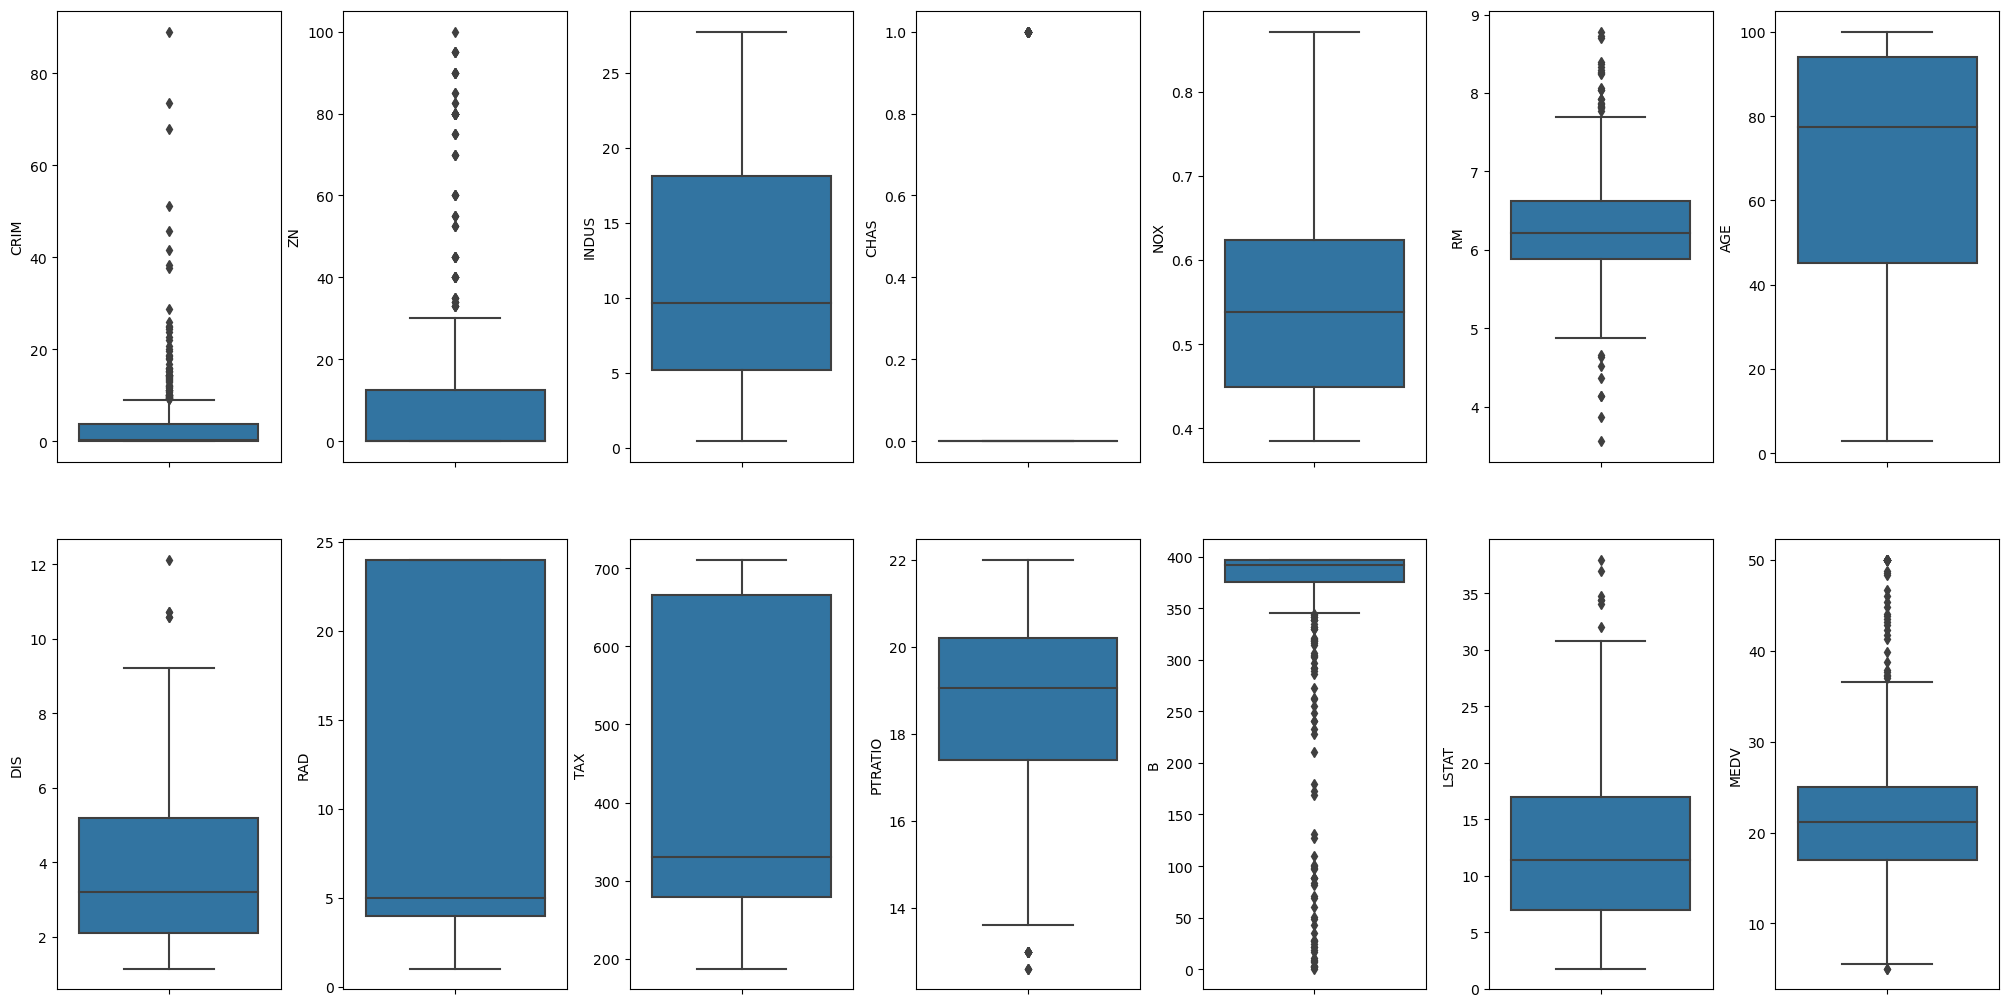

In [81]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

`Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.`

In [82]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [83]:
# Let's remove MEDV outliers (MEDV = 50.0)
df = df[~(df['MEDV'] >= 50.0)]

<AxesSubplot:>

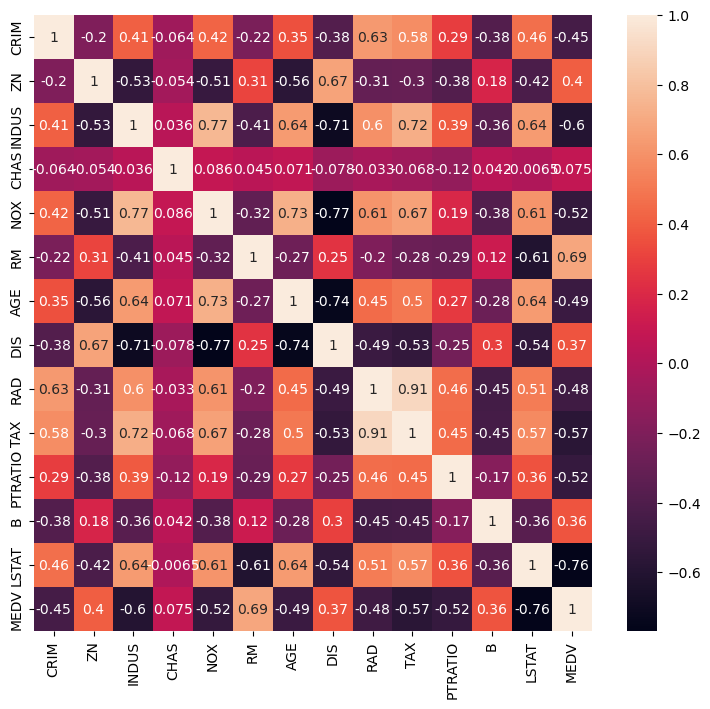

In [84]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), annot=True, color='red')

In [85]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
#min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=x, columns=column_sels)

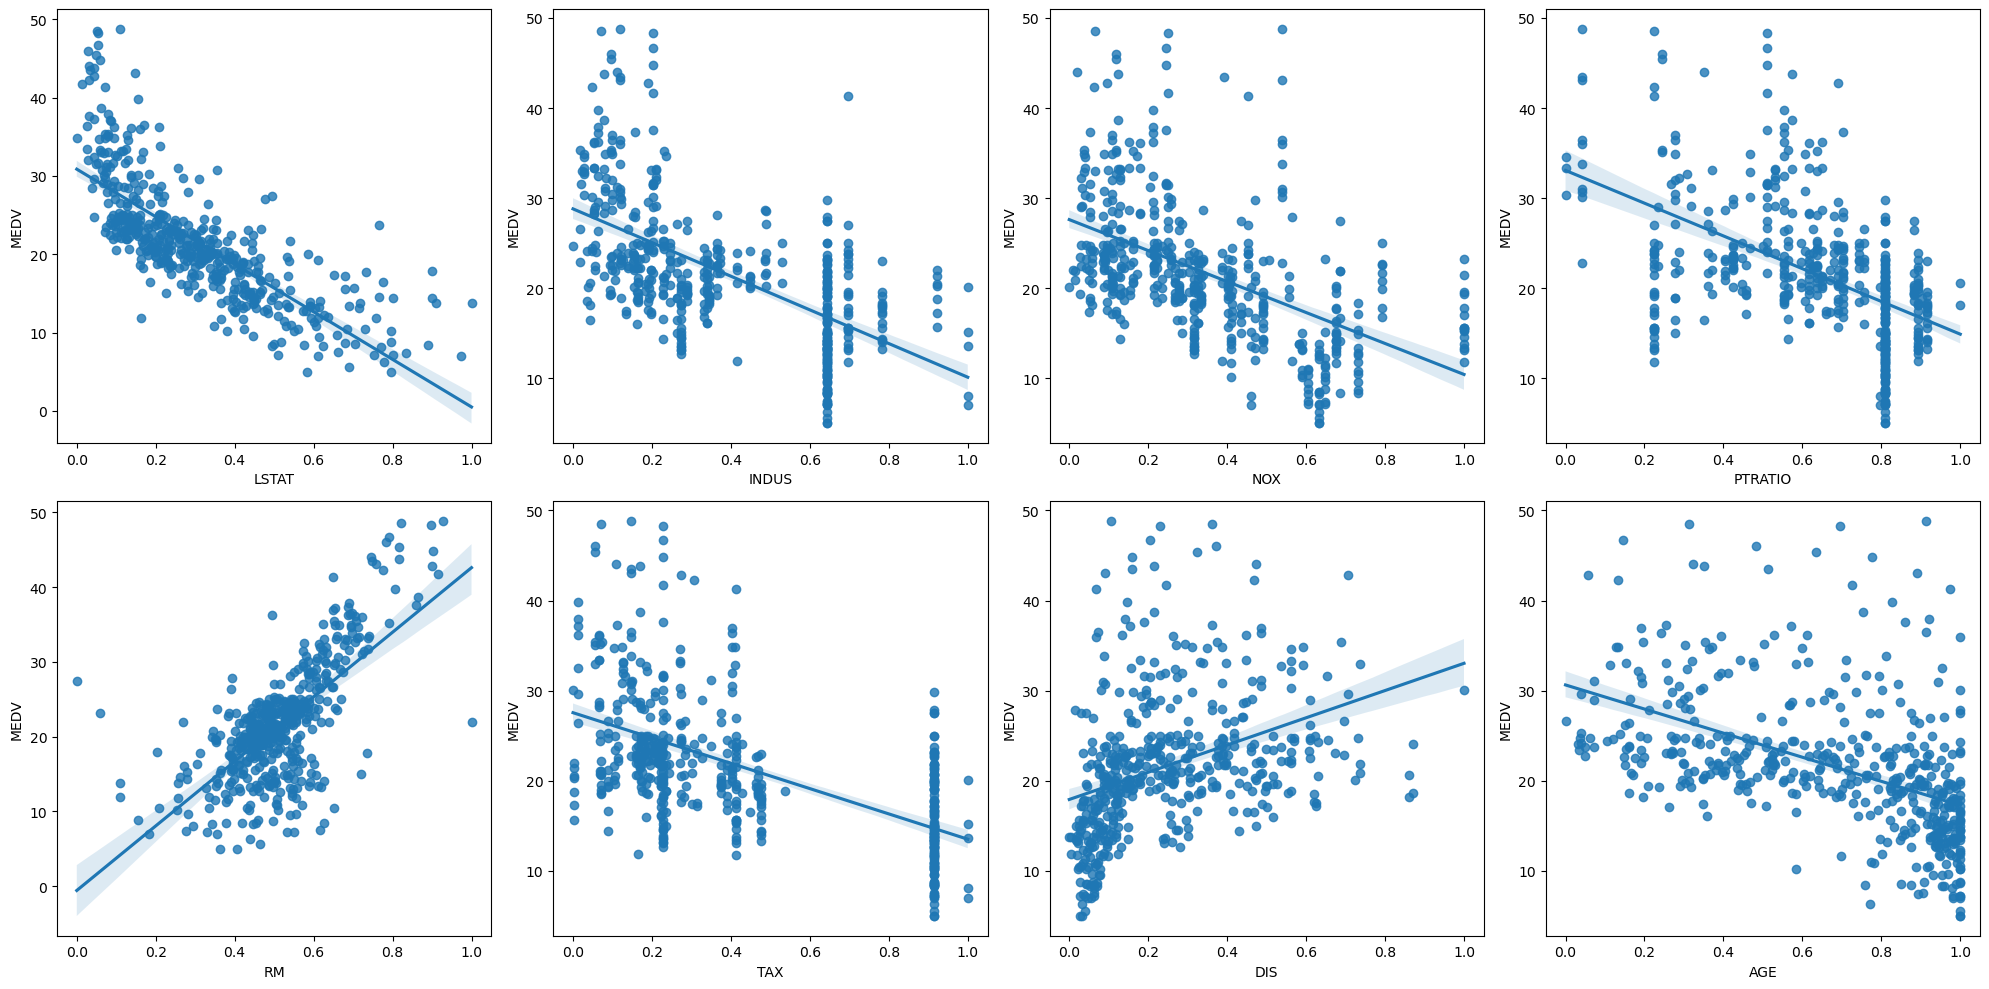

In [86]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout()

`As we can see the corr of MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features are more. So Let's try to predict from them and also lets remove the skewness of the data trough log transformation.`

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x.values, y, test_size=0.3, random_state=101)

In [90]:
X_train, y

(array([[0.30397333, 0.33148148, 0.41152263, ..., 0.38931298, 0.11575595,
         0.64263646],
        [0.473187  , 0.64296296, 0.67489712, ..., 0.91412214, 0.13136175,
         0.8753862 ],
        [0.59349819, 0.64296296, 0.56378601, ..., 0.91412214, 0.00373993,
         1.        ],
        ...,
        [0.11141984, 0.04703704, 0.10288066, ..., 0.17748092, 0.65580782,
         0.27600412],
        [0.31369825, 0.26407407, 0.28600823, ..., 0.23664122, 0.46314209,
         0.82389289],
        [0.22811892, 0.64296296, 0.79218107, ..., 0.91412214, 0.08795669,
         0.96086509]]),
 0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: MEDV, Length: 490, dtype: float64)

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)

In [93]:
y_pred[0]

27.965311708433504

In [94]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
mse

17.594394793648622

In [95]:
import joblib
joblib.dump(model, 'model2.pkl')

['model2.pkl']

In [57]:
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,0.080064,0.056520,0.273696,0.252496,0.577505,0.188979,0.238001,0.495675
1,0.181441,0.210621,0.159428,0.440312,0.547998,0.099811,0.299010,0.578128
2,0.055397,0.210621,0.159428,0.440312,0.694386,0.099811,0.299010,0.469617
3,0.026325,0.051960,0.139941,0.500130,0.658555,0.064658,0.370303,0.365901
4,0.089001,0.051960,0.139941,0.500130,0.687105,0.064658,0.370303,0.424170
...,...,...,...,...,...,...,...,...
485,0.193649,0.346737,0.327021,0.638489,0.580954,0.151967,0.115184,0.519848
486,0.180050,0.346737,0.327021,0.638489,0.490324,0.151967,0.099566,0.565337
487,0.096850,0.346737,0.327021,0.638489,0.654340,0.151967,0.089632,0.645695
488,0.117814,0.346737,0.327021,0.638489,0.619467,0.151967,0.107883,0.636473


In [59]:
y = df['MEDV']